In [1]:
import torch
import os
import pickle
from tqdm import tqdm
from sklearn import metrics
from ClipAdapter.dataset import CoCoDataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
labels=[
        "PC",
        "PC-truck",
        "dozer",
        "dump-truck",
        "excavator",
        "mixer",
        "people-helmet",
        "people-no-helmet",
        "roller",
        "wheel-loader",
]

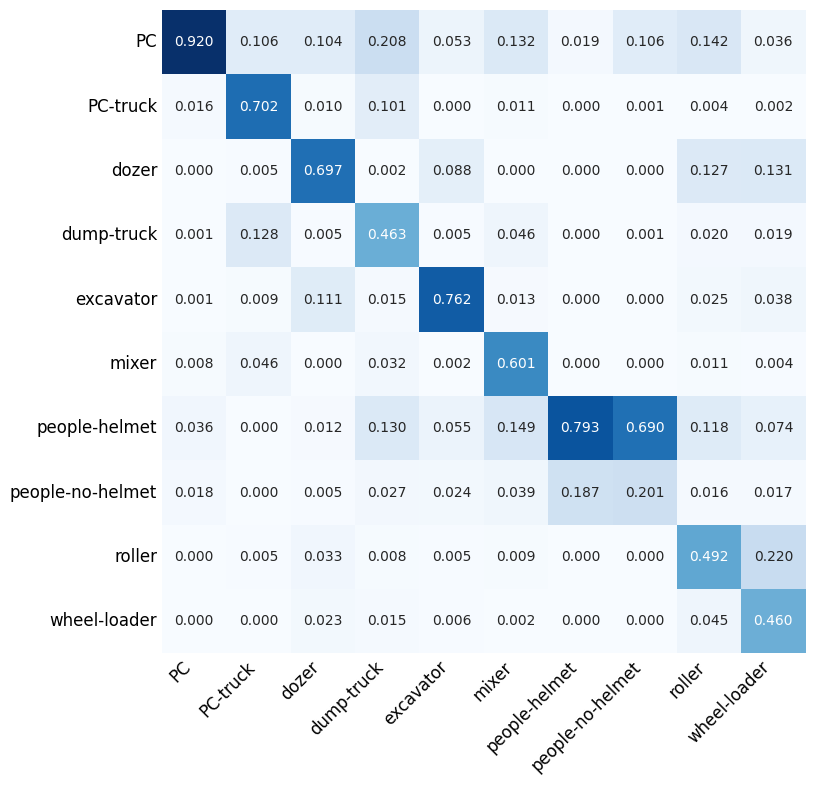

In [9]:
tag="zero"
with open(f"./result/B32-{tag}.pkl","rb") as fp:
    result=pickle.load(fp)
y_true = result[1]
y_pred = result[0]
cm=confusion_matrix(y_true, y_pred,normalize='pred')
# plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(16, 8))
ax = sns.heatmap(cm, 
                # xticklabels=df.corr().columns, 
                # yticklabels=df.corr().columns, 
                # cmap='magma',
                # linewidths=6, 
                 vmin=0, vmax=1,
                 square=True,
                 cbar=False,
                 cmap='Blues',
                 fmt=".3f",
                annot=True)

plt.xticks(np.arange(len(labels)) + 0.5, labels,fontsize=12)
plt.yticks(np.arange(len(labels)) + 0.5, labels,fontsize=12)   
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0,ha='right') 
# plt.yaxis.set_tick_params(rotation=45)
# plt.gca().tick_params(axis='y', rotation=45)
# plt.subplots_adjust(left=0.15)
plt.tight_layout()
plt.tick_params(axis='both', which='both', length=0)
# plt.show()
plt.savefig(f'confusion_matrix_{tag}.png', dpi=1000, transparent=True)